In [1]:
import torch
import numpy as np 
import pandas as pd
from torchmetrics.audio import SignalDistortionRatio
import torchaudio
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd

from tqdm import tqdm

from pathlib import Path

/home/ecabrera/instrument_separation/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mixture, sr = librosa.load("musdb18hq/train/A Classic Education - NightOwl/mixture.wav", sr=44100)
bass, sr = librosa.load("musdb18hq/train/A Classic Education - NightOwl/bass.wav", sr=44100)
drums, sr = librosa.load("musdb18hq/train/A Classic Education - NightOwl/drums.wav", sr=44100)
vocals, sr = librosa.load("musdb18hq/train/A Classic Education - NightOwl/vocals.wav", sr=44100)
other, sr = librosa.load("musdb18hq/train/A Classic Education - NightOwl/other.wav", sr=44100)

In [3]:
mixture = librosa.resample(mixture, orig_sr=44100, target_sr=8000)
bass = librosa.resample(bass, orig_sr=44100, target_sr=8000)
drums = librosa.resample(drums, orig_sr=44100, target_sr=8000)
vocals = librosa.resample(vocals, orig_sr=44100, target_sr=8000)
other = librosa.resample(other, orig_sr=44100, target_sr=8000)

In [4]:
sr = 8000
init = int(10.24*sr)
end = int(10.48*sr)

mixture_ = mixture[init:end]
bass_ = bass[init:end]
drums_ = drums[init:end]
vocals_ = vocals[init:end]
other_ = other[init:end]

Text(0.5, 1.0, 'Mixture')

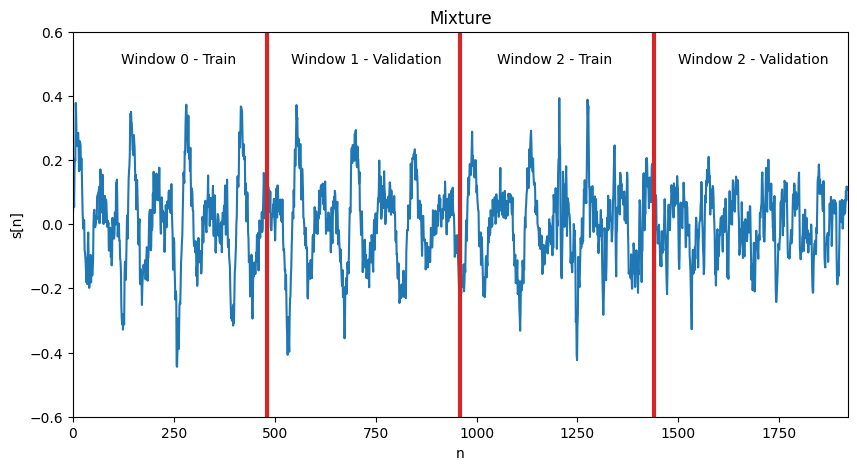

In [379]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(mixture_)
ax.vlines([480, 480*2, 480*3], ymin=-0.6, ymax=6, color="tab:red", linewidth=3)
ax.set_ylim(-0.6, 0.6);
ax.set_xlim(0, int(480*4))
ax.set_ylabel("s[n]")
ax.set_xlabel("n")
ax.annotate("Window 0 - Train", (120, 0.5))
ax.annotate("Window 1 - Validation", (540, 0.5))
ax.annotate("Window 2 - Train", (1050, 0.5))
ax.annotate("Window 2 - Validation", (1500, 0.5))
ax.set_title("Mixture")

Text(0.5, 1.0, 'Mixture')

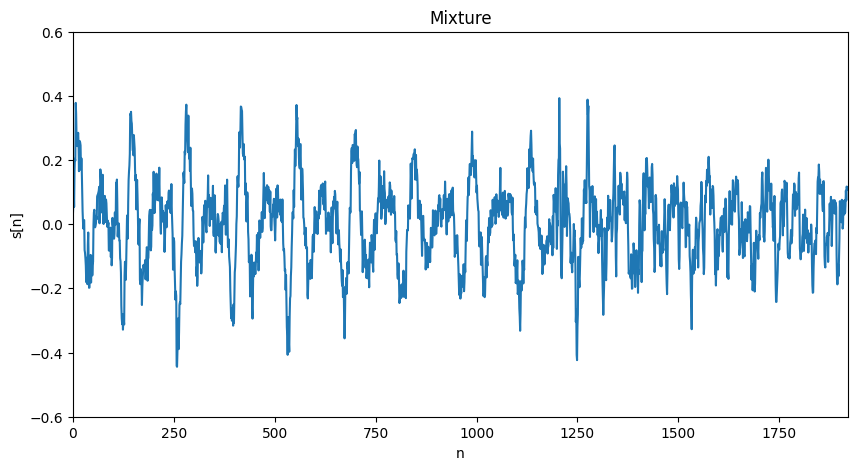

In [380]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(mixture_)
ax.set_ylim(-0.6, 0.6);
ax.set_xlim(0, int(480*4))
ax.set_ylabel("s[n]")
ax.set_xlabel("n")
ax.set_title("Mixture")

Text(0.5, 1.0, 'Bass')

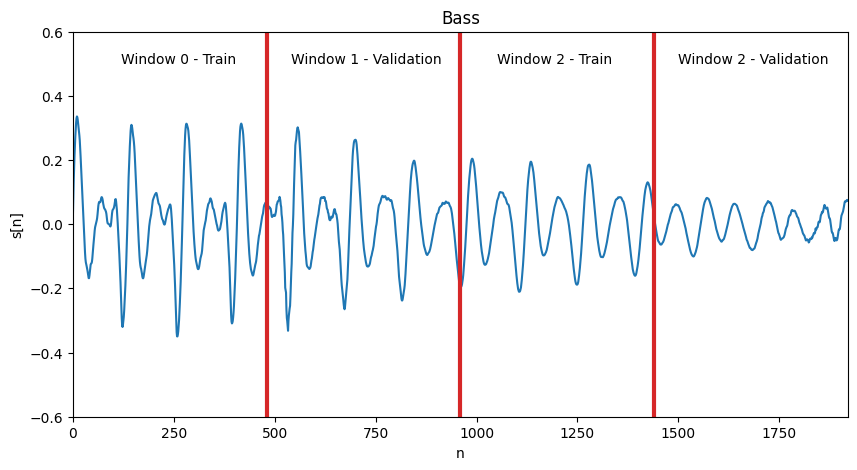

In [381]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(bass_)
ax.vlines([480, 480*2, 480*3], ymin=-0.6, ymax=6, color="tab:red", linewidth=3)
ax.set_ylim(-0.6, 0.6);
ax.set_xlim(0, int(480*4))
ax.set_ylabel("s[n]")
ax.set_xlabel("n")
ax.annotate("Window 0 - Train", (120, 0.5))
ax.annotate("Window 1 - Validation", (540, 0.5))
ax.annotate("Window 2 - Train", (1050, 0.5))
ax.annotate("Window 2 - Validation", (1500, 0.5))
ax.set_title("Bass")

Text(0.5, 1.0, 'Bass')

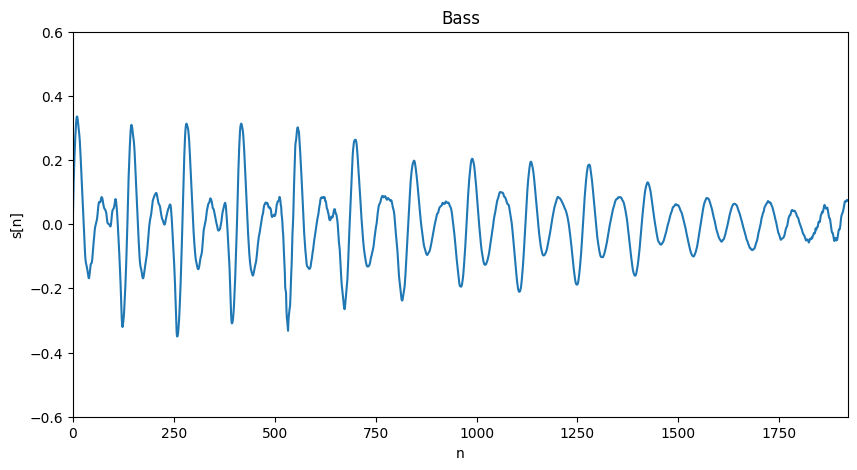

In [382]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(bass_)
ax.set_ylim(-0.6, 0.6);
ax.set_xlim(0, int(480*4))
ax.set_ylabel("s[n]")
ax.set_xlabel("n")
ax.set_title("Bass")

In [383]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(drums_)
ax.vlines([480, 480*2, 480*3], ymin=-0.6, ymax=6, color="tab:red", linewidth=3)
ax.set_ylim(-0.6, 0.6);
ax.set_xlim(0, int(480*4))
ax.set_ylabel("s[n]")
ax.set_xlabel("n")
ax.annotate("Window 0 - Train", (120, 0.5))
ax.annotate("Window 1 - Validation", (540, 0.5))
ax.annotate("Window 2 - Train", (1050, 0.5))
ax.annotate("Window 2 - Validation", (1500, 0.5))
ax.set_title("Drums")

Text(0.5, 1.0, 'Drums')

In [385]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(drums_)
ax.set_ylim(-0.6, 0.6);
ax.set_xlim(0, int(480*4))
ax.set_ylabel("s[n]")
ax.set_xlabel("n")
ax.set_title("Drums")

Text(0.5, 1.0, 'Drums')

In [386]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(vocals_)
ax.vlines([480, 480*2, 480*3], ymin=-0.6, ymax=6, color="tab:red", linewidth=3)
ax.set_ylim(-0.6, 0.6);
ax.set_xlim(0, int(480*4))
ax.set_ylabel("s[n]")
ax.set_xlabel("n")
ax.annotate("Window 0 - Train", (120, 0.5))
ax.annotate("Window 1 - Validation", (540, 0.5))
ax.annotate("Window 2 - Train", (1050, 0.5))
ax.annotate("Window 2 - Validation", (1500, 0.5))
ax.set_title("Vocals")

Text(0.5, 1.0, 'Vocals')

Text(0.5, 1.0, 'Vocals')

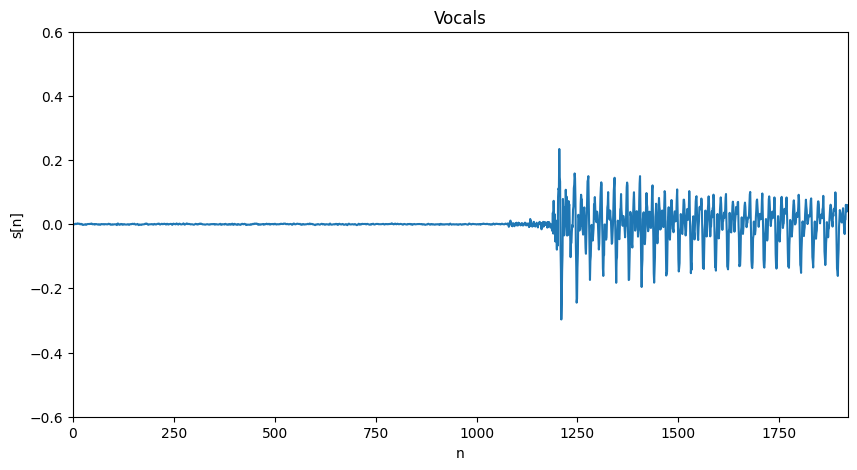

In [387]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(vocals_)
ax.set_ylim(-0.6, 0.6);
ax.set_xlim(0, int(480*4))
ax.set_ylabel("s[n]")
ax.set_xlabel("n")
ax.set_title("Vocals")

Text(0.5, 1.0, 'Other')

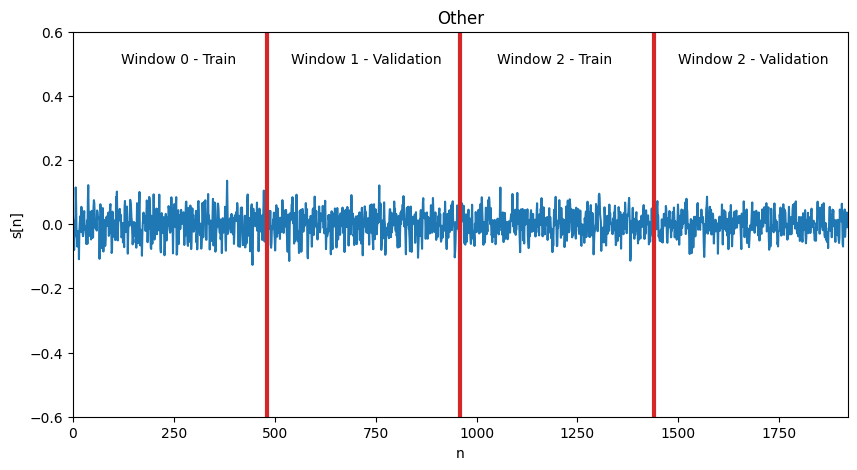

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(other_)
ax.vlines([480, 480*2, 480*3], ymin=-0.6, ymax=6, color="tab:red", linewidth=3)
ax.set_ylim(-0.6, 0.6);
ax.set_xlim(0, int(480*4))
ax.set_ylabel("s[n]")
ax.set_xlabel("n")
ax.annotate("Window 0 - Train", (120, 0.5))
ax.annotate("Window 1 - Validation", (540, 0.5))
ax.annotate("Window 2 - Train", (1050, 0.5))
ax.annotate("Window 2 - Validation", (1500, 0.5))
ax.set_title("Other")

Text(0.5, 1.0, 'Other')

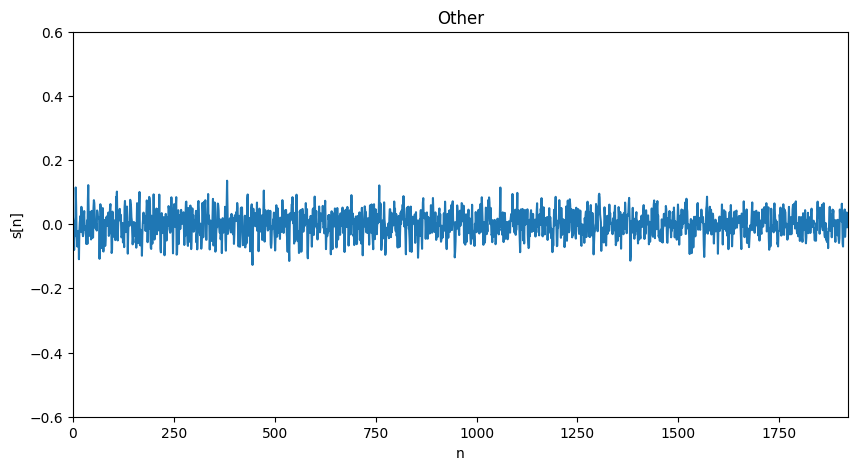

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(other_)
ax.set_ylim(-0.6, 0.6);
ax.set_xlim(0, int(480*4))
ax.set_ylabel("s[n]")
ax.set_xlabel("n")
ax.set_title("Other")

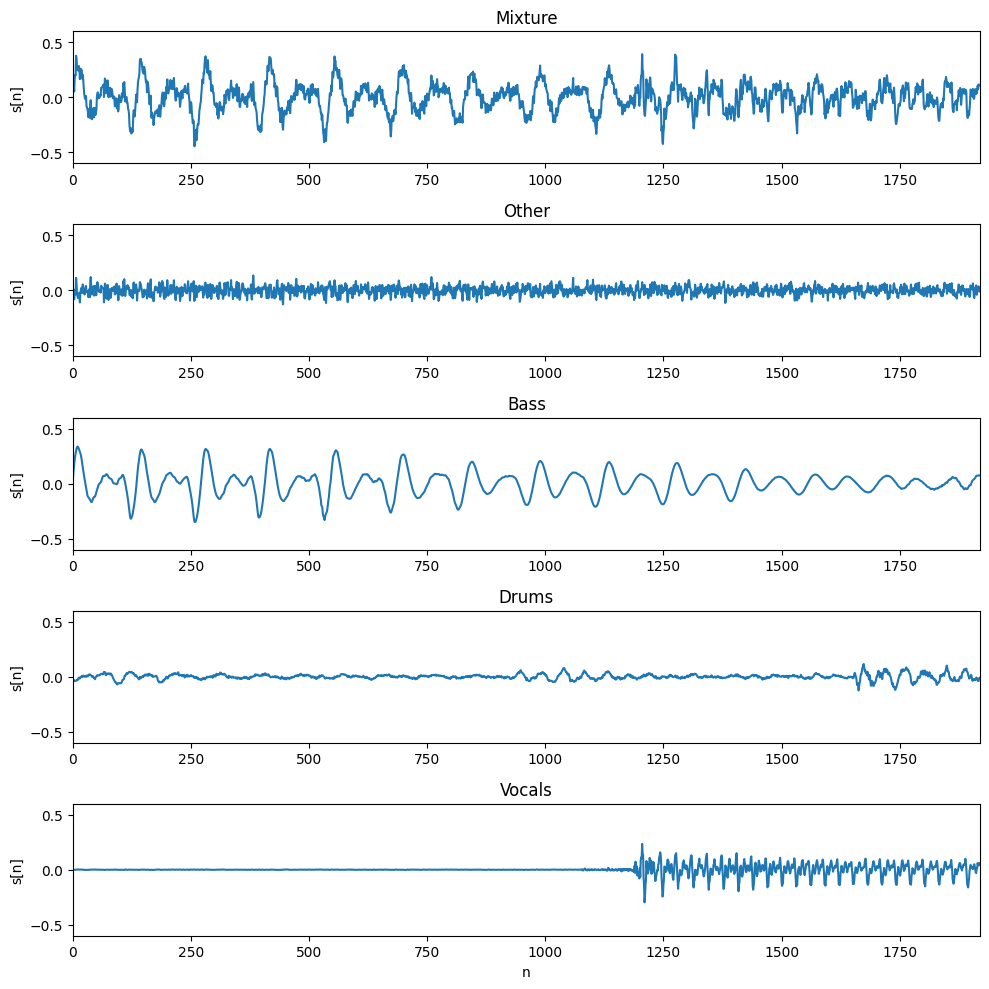

In [26]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=5)

ax[0].plot(mixture_)
ax[0].set_ylim(-0.6, 0.6);
ax[0].set_title("Mixture")
ax[0].set_ylabel("s[n]")
ax[0].set_xlim(0, int(480*4))

ax[1].plot(other_)
ax[1].set_ylim(-0.6, 0.6);
ax[1].set_title("Other")
ax[1].set_ylabel("s[n]")
ax[1].set_xlim(0, int(480*4))

ax[2].plot(bass_)
ax[2].set_ylim(-0.6, 0.6);
ax[2].set_title("Bass");
ax[2].set_ylabel("s[n]")
ax[2].set_xlim(0, int(480*4))

ax[3].plot(drums_)
ax[3].set_ylim(-0.6, 0.6);
ax[3].set_title("Drums");
ax[3].set_ylabel("s[n]")
ax[3].set_xlim(0, int(480*4))

ax[4].plot(vocals_)
ax[4].set_ylim(-0.6, 0.6);
ax[4].set_title("Vocals");
ax[4].set_xlabel("n")
ax[4].set_ylabel("s[n]")
ax[4].set_xlim(0, int(480*4))

fig.tight_layout()

In [30]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=4)

ax[0].plot(mixture_)
ax[0].set_ylim(-0.6, 0.6);
ax[0].set_title("Mixture")
ax[0].set_ylabel("s[n]")
ax[0].set_xlim(0, int(480*4))
ax[0].vlines([480, 480*2, 480*3], ymin=-0.6, ymax=6, color="tab:red", linewidth=3)
ax[0].annotate("Window 0 - Train", (120, 0.45), size=12)
ax[0].annotate("Window 1 - Validation", (540, 0.45), size=12)
ax[0].annotate("Window 2 - Train", (1050, 0.45), size=12)
ax[0].annotate("Window 2 - Validation", (1500, 0.45), size=12)

ax[1].plot(bass_)
ax[1].set_ylim(-0.6, 0.6);
ax[1].set_title("Bass");
ax[1].set_ylabel("s[n]")
ax[1].set_xlim(0, int(480*4))
ax[1].vlines([480, 480*2, 480*3], ymin=-0.6, ymax=6, color="tab:red", linewidth=3)

ax[2].plot(drums_)
ax[2].set_ylim(-0.6, 0.6);
ax[2].set_title("Drums");
ax[2].set_ylabel("s[n]")
ax[2].set_xlim(0, int(480*4))
ax[2].vlines([480, 480*2, 480*3], ymin=-0.6, ymax=6, color="tab:red", linewidth=3)

ax[3].plot(vocals_)
ax[3].set_ylim(-0.6, 0.6);
ax[3].set_title("Vocals");
ax[3].set_xlabel("n")
ax[3].set_ylabel("s[n]")
ax[3].set_xlim(0, int(480*4))
ax[3].vlines([480, 480*2, 480*3], ymin=-0.6, ymax=6, color="tab:red", linewidth=3)

fig.tight_layout()

In [33]:
mixture_window = mixture_[:480]

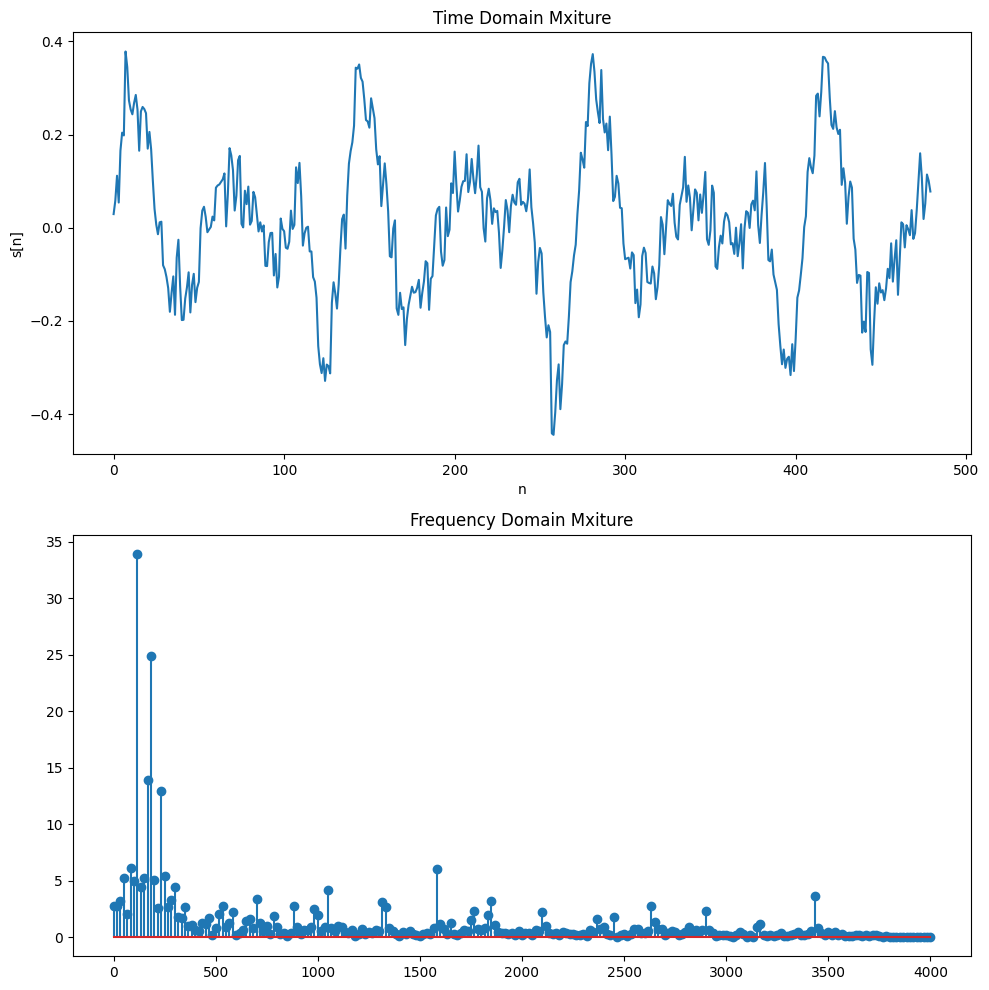

In [41]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=2)

ax[0].plot(mixture_window)
ax[0].set_title("Time Domain Mxiture")
ax[0].set_xlabel('n')
ax[0].set_ylabel('s[n]')

fs = 8000
N = mixture_window.shape[0]
X = np.abs(np.fft.fft(mixture_window))
freq = np.linspace(0, fs/2, N//2+1)

X = X[:N//2 + 1]

freq = freq[:N//2 + 1]

ax[1].stem(freq, X)
ax[1].set_title("Frequency Domain Mxiture")
ax[1].set_xlabel('Frequency (Hz)')
ax[1].plt.set_ylabel('Amplitude')

fig.tight_layout()

In [101]:
inference_dataset = "inference/split/val"
inference_dataset = Path(inference_dataset)
musics = list(inference_dataset.glob("*"))

In [158]:
inference_dataset = "inference/split/train"
inference_dataset = Path(inference_dataset)
musics_train = list(inference_dataset.glob("*"))

In [102]:
example = pd.read_csv(musics[1])

In [103]:
example.shape

(2428800, 6)

In [104]:
example = example.to_numpy()

In [109]:
ipd.Audio(example[640000:1280000, 4], rate=8000)

In [110]:
ipd.Audio(example[640000:1280000, 5], rate=8000)

In [111]:
frames = torch.tensor(librosa.util.frame(example, frame_length=480, hop_length=480, axis=0))

bass_frames = frames[:, :, 0:2]
drums_frames = frames[:, :, 2:4]
vocals_frames = frames[:, :, 4:6]   

In [200]:
frames.shape

torch.Size([5060, 480, 6])

In [112]:
sdr = SignalDistortionRatio(zero_mean=True)
def calculate_sdr(frames):
    if torch.all(frames[:, 0] == 0).item():
        frames[:, 0] += torch.randn(frames[:, 0].shape) * 1e-6
        #return None
    sdr_ = sdr(frames[:, 0], frames[:, 1]).item()
    return sdr_

In [113]:
def get_df_metrics(musics):
    sdrs = []
    for music_id, music in enumerate(musics):
        example = pd.read_csv(music)
        frames = torch.tensor(librosa.util.frame(example, frame_length=480, hop_length=480, axis=0))

        bass_frames = frames[:, :, 0:2]
        drums_frames = frames[:, :, 2:4]
        vocals_frames = frames[:, :, 4:6]   

        bass_sdr = []
        drums_sdr = []
        vocals_sdr = []
        window_id = []
        for i in tqdm(range(frames.shape[0])):
            bass_sdr.append(calculate_sdr(bass_frames[i]))
            drums_sdr.append(calculate_sdr(drums_frames[i]))
            vocals_sdr.append(calculate_sdr(vocals_frames[i]))
            window_id.append(i)
        
        sdrs.append(pd.DataFrame({"bass": bass_sdr, "drums": drums_sdr, "vocals": vocals_sdr, "music_id": [music_id]*len(bass_sdr), "window_id": window_id}))
        
    return pd.concat(sdrs)        

In [114]:
df_val = get_df_metrics(musics)

100%|██████████| 7254/7254 [00:48<00:00, 148.23it/s]


In [138]:
df_val = pd.read_csv("sdr_split_val.csv")

In [141]:
df_val.to_csv("sdr_split_val.csv", index=False)

In [133]:
df_val["in_dist"] = False
df_val["train"] = False

In [147]:
df = pd.read_csv("sdr_split_train.csv")

In [153]:
df = pd.concat([df, df_val])

In [150]:
df.to_csv("sdr_split_train.csv", index=False)

In [145]:
df["train"] = df["window_id"] % 2 == 0
df["in_dist"] = True

In [95]:
def percentile(n):
    def percentile_(x):
        return x.quantile(n)
    percentile_.__name__ = 'percentile_{:02.0f}'.format(n*100)
    return percentile_

In [390]:
df[df["train"] == True]

bass      drums    vocals  music_id  window_id  train  in_dist
0       3.934869   6.384994  2.329942         0          0   True     True
2       3.580858   5.987569  1.749669         0          2   True     True
4       4.263104   6.374370  2.014423         0          4   True     True
6       3.624685   6.338120  1.585090         0          6   True     True
8       3.833983   5.746418  2.609353         0          8   True     True
...          ...        ...       ...       ...        ...    ...      ...
36240  10.360177   5.550476  2.899364         9       3252   True     True
36242   5.891339   8.123008  1.982698         9       3254   True     True
36244   3.841999   2.380635  1.811604         9       3256   True     True
36246   1.353450   6.798123  2.297113         9       3258   True     True
36248   0.794177  11.614364  1.586286         9       3260   True     True

[18128 rows x 7 columns]

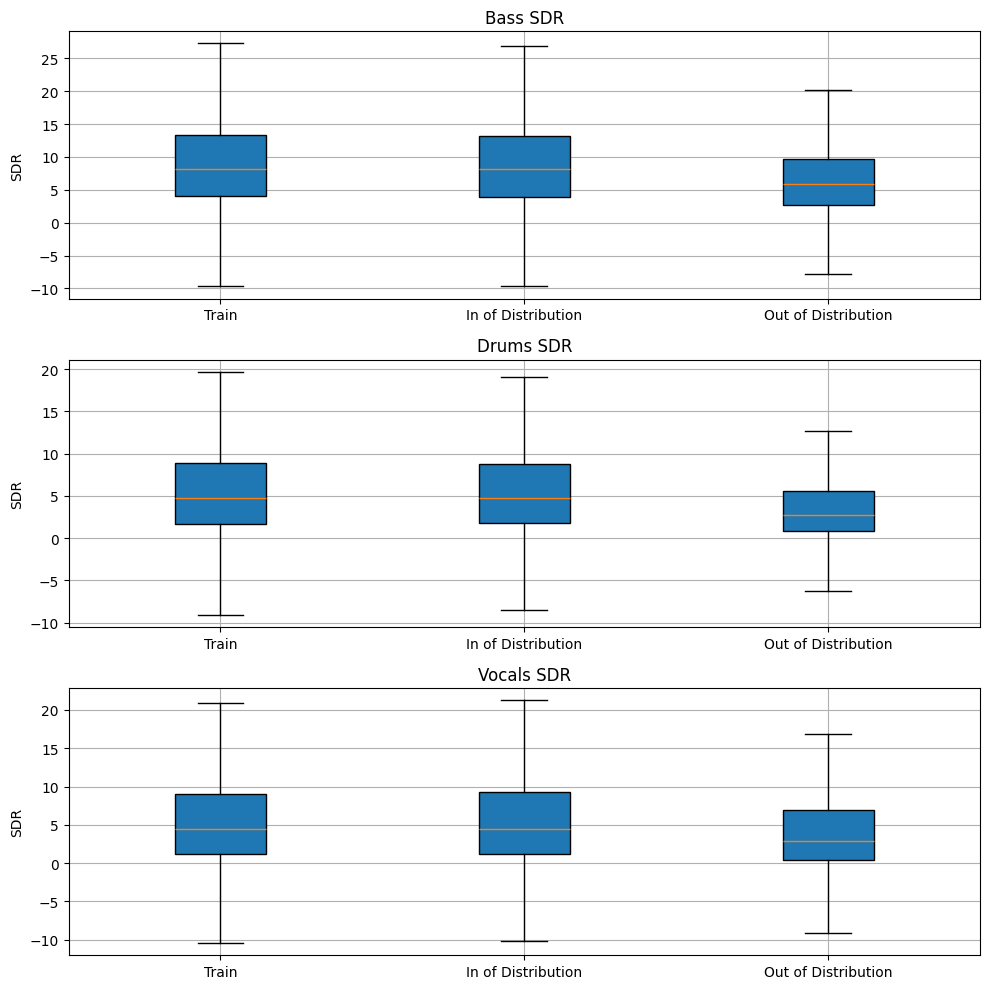

In [419]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=3)

boxplots = [
    df[df["train"] == True]["bass"],
    df[(df["train"] == False) & (df["in_dist"] == True)]["bass"],
    df[(df["train"] == False) & (df["in_dist"] == False)]["bass"],
]

ax[0].boxplot(boxplots, labels=["Train", "In of Distribution", "Out of Distribution"], showfliers=False, patch_artist=True);
ax[0].set_title("Bass SDR")
ax[0].set_ylabel("SDR")
ax[0].grid()

boxplots = [
    df[df["train"] == True]["drums"],
    df[(df["train"] == False) & (df["in_dist"] == True)]["drums"],
    df[(df["train"] == False) & (df["in_dist"] == False)]["drums"],
]

ax[1].boxplot(boxplots, labels=["Train", "In of Distribution", "Out of Distribution"], showfliers=False, patch_artist=True);
ax[1].set_title("Drums SDR")
ax[1].set_ylabel("SDR")
ax[1].grid()

boxplots = [
    df[df["train"] == True]["vocals"],
    df[(df["train"] == False) & (df["in_dist"] == True)]["vocals"],
    df[(df["train"] == False) & (df["in_dist"] == False)]["vocals"],
]

ax[2].boxplot(boxplots, labels=["Train", "In of Distribution", "Out of Distribution"], showfliers=False, patch_artist=True);
ax[2].set_title("Vocals SDR")
ax[2].set_ylabel("SDR")
ax[2].grid()

fig.tight_layout()

In [157]:
df.groupby(["in_dist", "train"]).agg(["min", percentile(0.25), "median", percentile(0.75), "max"])[["bass", "drums", "vocals"]]

bass                                                   \
                     min percentile_25    median percentile_75        max   
in_dist train                                                               
False   False -16.793404      2.678351  5.821321      9.683676  23.893354   
True    False -15.110234      3.921445  8.152557     13.111988  30.706123   
        True  -13.732368      4.010777  8.224757     13.315045  33.642475   

                   drums                                                   \
                     min percentile_25    median percentile_75        max   
in_dist train                                                               
False   False -20.770729      0.818592  2.723325      5.546023  24.012867   
True    False -17.705147      1.812411  4.740052      8.737567  34.330139   
        True  -17.194145      1.719750  4.751642      8.925119  32.644463   

                  vocals                                                   
                     min percentile_25    median percentile_75        max  
in_dist train                                                              
False   False -11.968915      0.344218  2.937778      6.960211  24.828403  
True    False -12.716805      1.174431  4.400495      9.224423  27.717062  
        True  -10.868551      1.222682  4.425659      9.085905  28.560080

In [301]:
df[(df["train"] == False) & (df["in_dist"] == False)].median()

bass            5.821321
drums           2.723325
vocals          2.937778
music_id        5.000000
window_id    2107.000000
train           0.000000
in_dist         0.000000
dtype: float64

In [ ]:
df[(df["train"] == False) & (df["in_dist"] == False) & (df["vocals"] > 3.2) & (df["vocals"] < 3.22)]

In [316]:
bass_windows = [
    (4, 572, True, 0),
    (8, 3329, True, 0),
    (5, 3261, False, 0)
]

drums_windows = [
    (3, 2608, True, 1),
    (7, 3237, True, 1),
    (2, 3201, False, 1)
]

vocals_windows = [
    (8, 2128, True, 2),
    (5, 1821, True, 2),
    (5, 3939, False, 2)
]

In [310]:
def to_window(n_music, n_window, train, instrument):
    if train:
        music = musics_train[n_music]
    else:
        music = musics[n_music]
    
    music_df = pd.read_csv(music).to_numpy()
    frames = librosa.util.frame(music_df, frame_length=480, hop_length=480, axis=0)
    
    if instrument == 0:
        frame = frames[n_window, :, :2]
    elif instrument == 1:
        frame = frames[n_window, :, 2:4]
    else:
        frame = frames[n_window, :, 4:]
    
    return frame

In [317]:
bass_windows = [to_window(*window) for window in bass_windows]
drums_windows = [to_window(*window) for window in drums_windows]
vocals_windows = [to_window(*window) for window in vocals_windows]

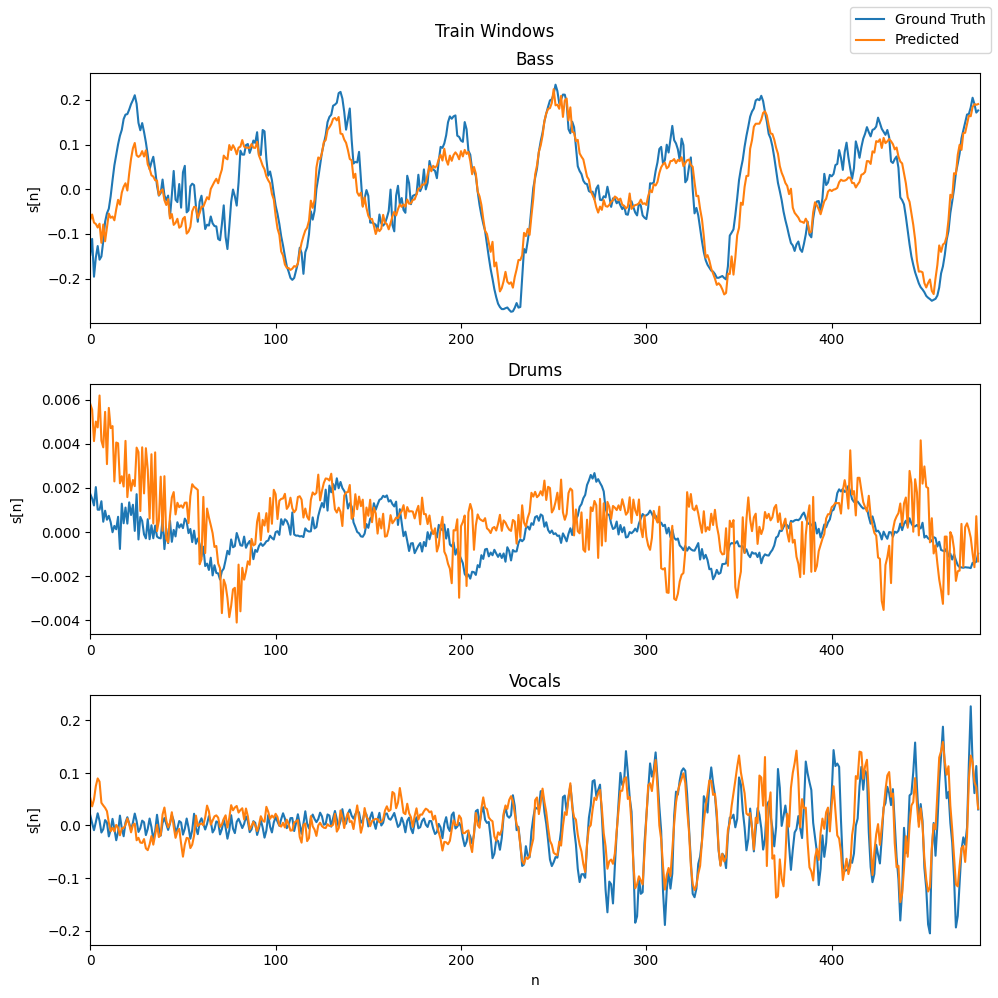

In [434]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=3, ncols=1)

fig.suptitle('Train Windows')

ax[0].plot(bass_windows[0][:, 0], label="Ground Truth")
ax[0].plot(bass_windows[0][:, 1], label="Predicted")
ax[0].set_title("Bass");
ax[0].set_ylabel("s[n]")
ax[0].set_xlim(0, 480)

ax[1].plot(drums_windows[0][:, 0], label="Ground Truth")
ax[1].plot(drums_windows[0][:, 1], label="Predicted")
ax[1].set_title("Drums");
ax[1].set_ylabel("s[n]")
ax[1].set_xlim(0, 480)

ax[2].plot(vocals_windows[0][:, 0], label="Ground Truth")
ax[2].plot(vocals_windows[0][:, 1], label="Predicted")
ax[2].set_title("Vocals");
ax[2].set_xlabel("n")
ax[2].set_ylabel("s[n]")
ax[2].set_xlim(0, 480)

handles, labels = ax[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

fig.tight_layout()

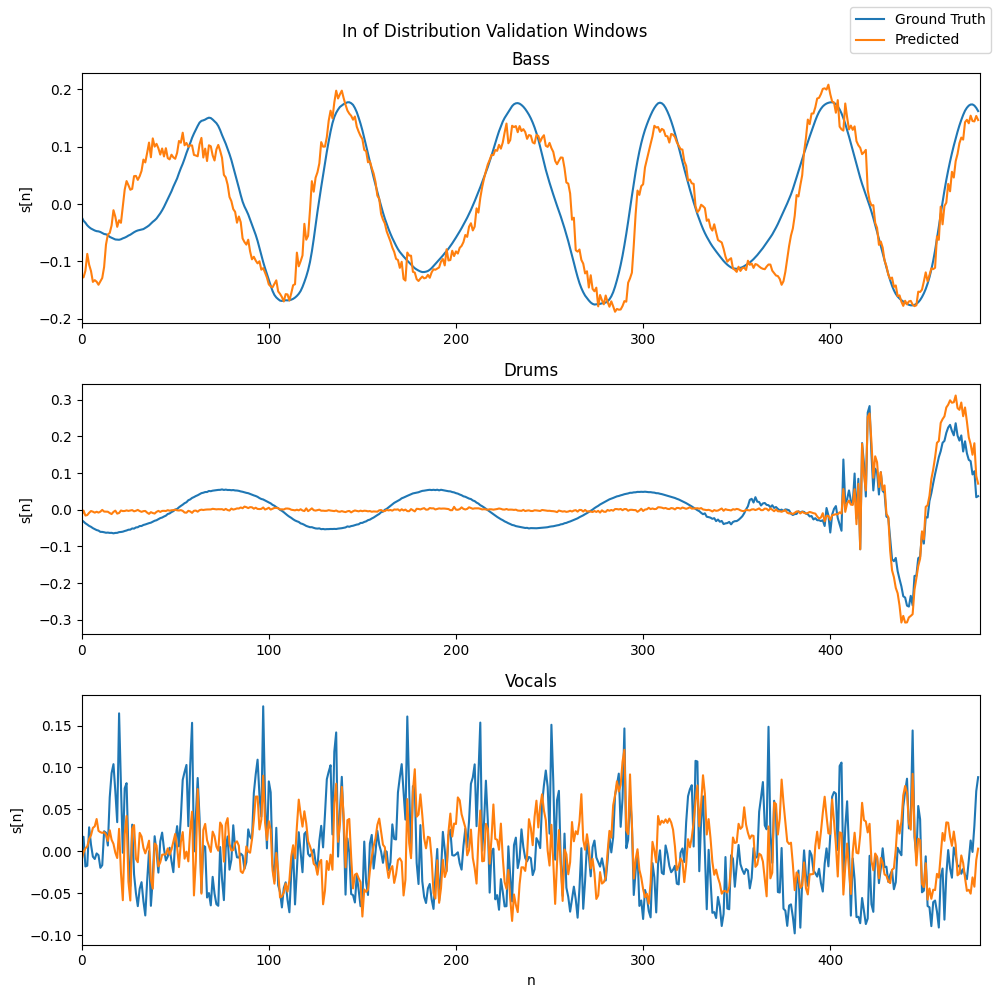

In [433]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=3, ncols=1)

fig.suptitle('In of Distribution Validation Windows')

ax[0].plot(bass_windows[1][:, 0], label="Ground Truth")
ax[0].plot(bass_windows[1][:, 1], label="Predicted")
ax[0].set_title("Bass");
ax[0].set_ylabel("s[n]")
ax[0].set_xlim(0, 480)


ax[1].plot(drums_windows[1][:, 0], label="Ground Truth")
ax[1].plot(drums_windows[1][:, 1], label="Predicted")
ax[1].set_title("Drums");
ax[1].set_ylabel("s[n]")
ax[1].set_xlim(0, 480)

ax[2].plot(vocals_windows[1][:, 0], label="Ground Truth")
ax[2].plot(vocals_windows[1][:, 1], label="Predicted")
ax[2].set_title("Vocals");
ax[2].set_xlabel("n")
ax[2].set_ylabel("s[n]")
ax[2].set_xlim(0, 480)
handles, labels = ax[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

fig.tight_layout()

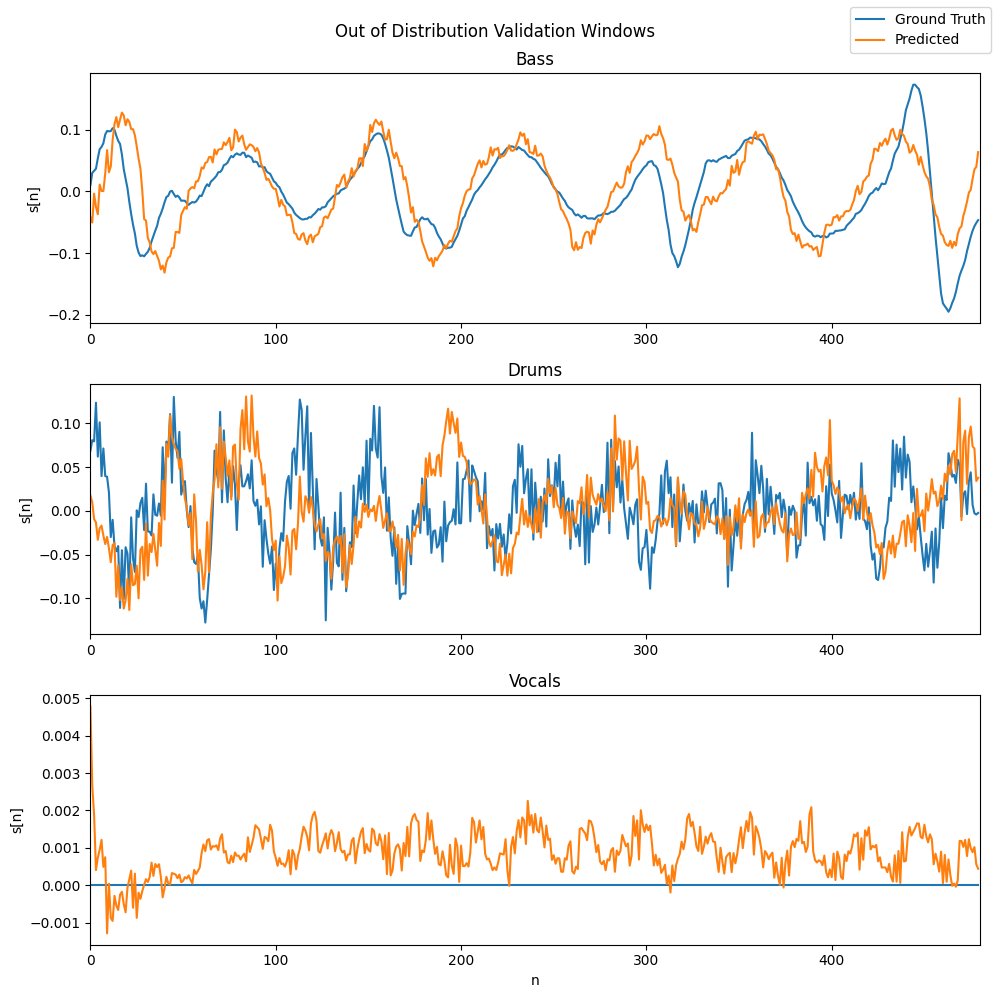

In [436]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=3, ncols=1)

fig.suptitle('Out of Distribution Validation Windows')

ax[0].plot(bass_windows[2][:, 0], label="Ground Truth")
ax[0].plot(bass_windows[2][:, 1], label="Predicted")
ax[0].set_title("Bass");
ax[0].set_ylabel("s[n]")
ax[0].set_xlim(0, 480)

ax[1].plot(drums_windows[2][:, 0], label="Ground Truth")
ax[1].plot(drums_windows[2][:, 1], label="Predicted")
ax[1].set_title("Drums");
ax[1].set_ylabel("s[n]")
ax[1].set_xlim(0, 480)

ax[2].plot(vocals_windows[2][:, 0], label="Ground Truth")
ax[2].plot(vocals_windows[2][:, 1], label="Predicted")
ax[2].set_title("Vocals");
ax[2].set_xlabel("n")
ax[2].set_ylabel("s[n]")
ax[2].set_xlim(0, 480)
handles, labels = ax[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.tight_layout()

In [450]:
bass_windows_2 = [
    (4, 572, True, 0),
    (4, 573, True, 0),
    (4, 574, True, 0),
    #(4, 575, True, 0),
    #(4, 576, True, 0)
]

bass_windows_2 = [to_window(*window) for window in bass_windows_2]

In [451]:
concat_windows = np.concatenate(bass_windows_2)

In [453]:
hamming = librosa.filters.get_window("hamming", concat_windows.shape[0])

In [458]:
hamming = hamming.reshape(-1, 1)

In [461]:
concat_window_w = concat_windows * hamming

(0.0, 1500.0)

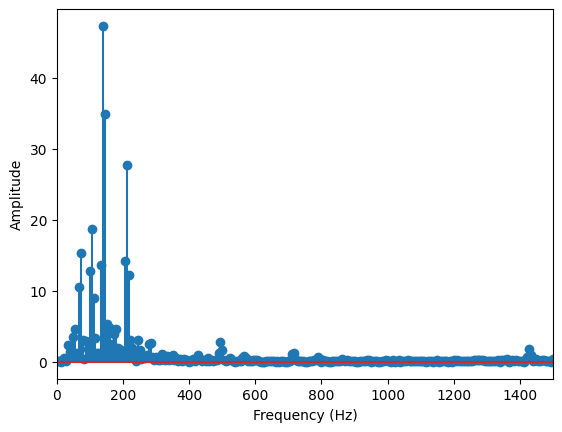

In [464]:
fs = 8000
N = concat_window_w.shape[0]
X = np.abs(np.fft.fft(concat_window_w[:, 0]))
freq = np.linspace(0, fs/2, N//2+1)

X = X[:N//2 + 1]

freq = freq[:N//2 + 1]

plt.stem(freq, X)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.xlim(0, 1500)

(0.0, 1500.0)

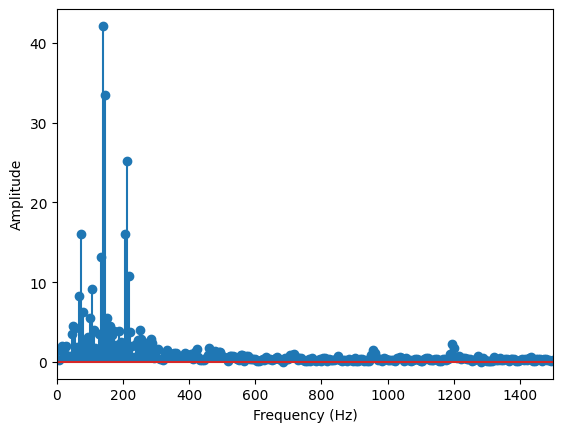

In [463]:
fs = 8000
N = concat_window_w.shape[0]
X = np.abs(np.fft.fft(concat_window_w[:, 1]))
freq = np.linspace(0, fs/2, N//2+1)

X = X[:N//2 + 1]

freq = freq[:N//2 + 1]

plt.stem(freq, X)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.xlim(0, 1500)

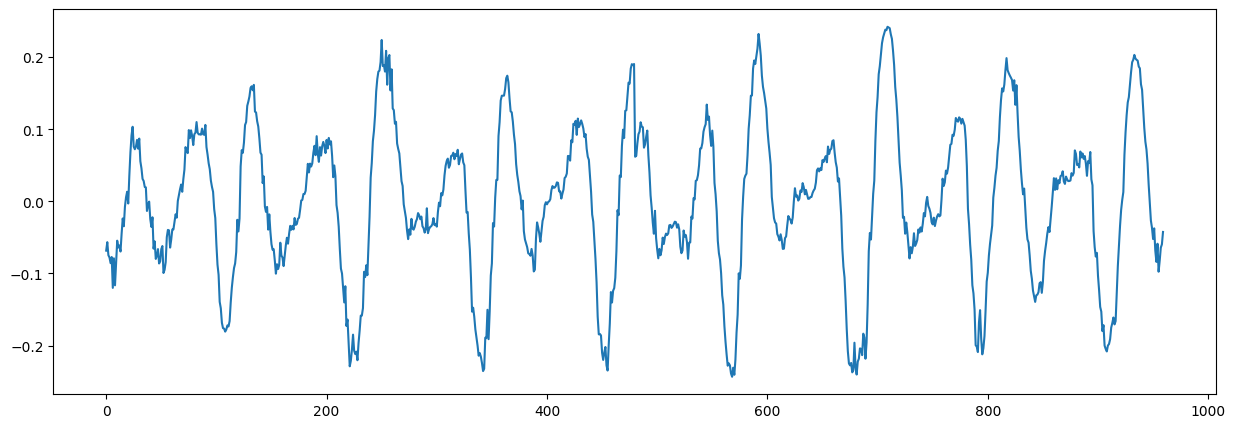

In [449]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(concat_windows[:, 1])

Text(0.5, 1.0, 'Spectrogram')

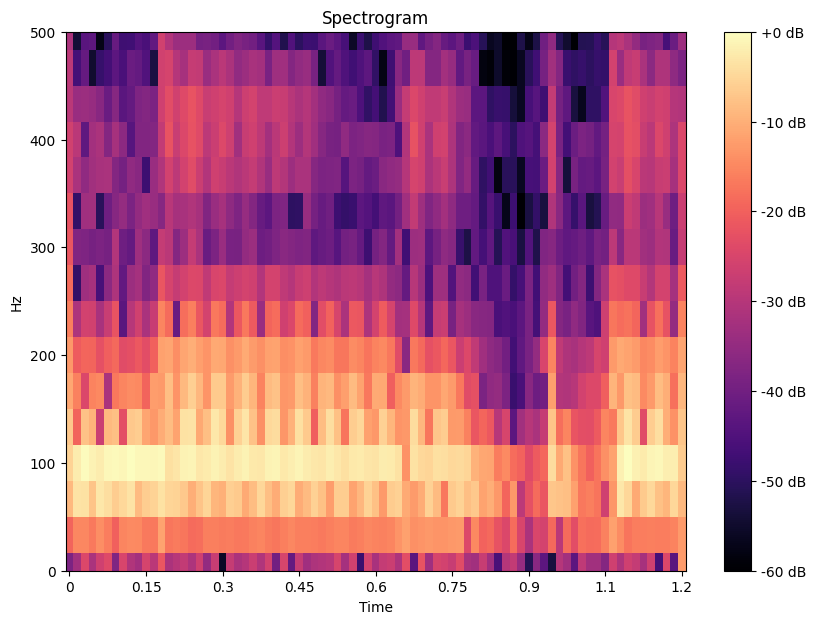

In [48]:
hop_length = 240 # 15 ms
n_window = 480 # 30 ms
n_fft = 480

X = librosa.stft(bass, win_length = n_window, n_fft = n_fft, hop_length = hop_length, 
                 window = 'hamming')
S_librosa = librosa.amplitude_to_db(np.abs(X),ref=np.max, top_db = 100)

fig, ax = plt.subplots(figsize=(10, 7))

librosa.display.specshow(S_librosa, y_axis = 'linear', x_axis = 'time', sr = 16000, 
                         hop_length = hop_length, vmin=-60)

plt.ylim(0, 500)

plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

Text(0.5, 1.0, 'Spectrogram')

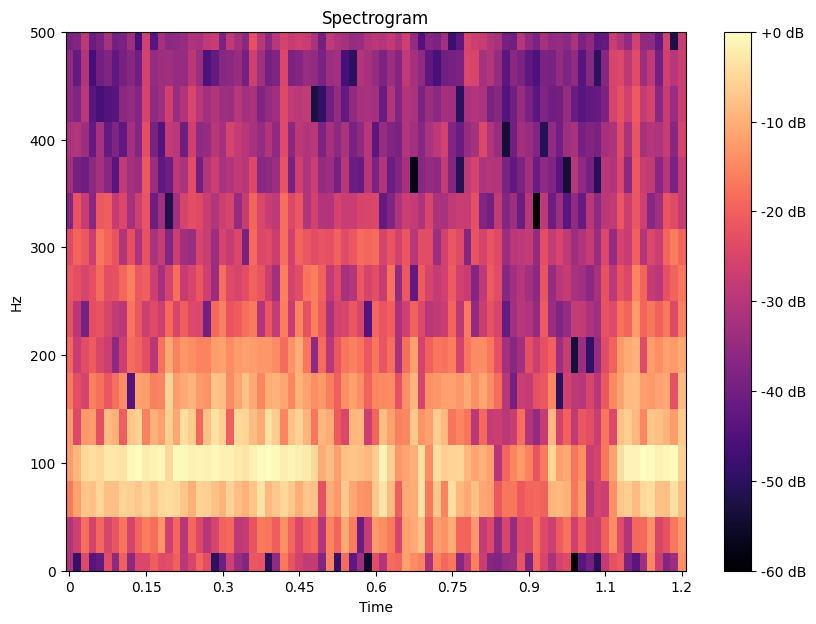

In [49]:
hop_length = 240 # 15 ms
n_window = 480 # 30 ms
n_fft = 480

X = librosa.stft(bass_hat, win_length = n_window, n_fft = n_fft, hop_length = hop_length, 
                 window = 'hamming')
S_librosa = librosa.amplitude_to_db(np.abs(X),ref=np.max, top_db = 100)

fig, ax = plt.subplots(figsize=(10, 7))

librosa.display.specshow(S_librosa, y_axis = 'linear', x_axis = 'time', sr = 16000, 
                         hop_length = hop_length, vmin=-60)

plt.ylim(0, 500)

plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

Text(0.5, 1.0, 'Spectrogram')

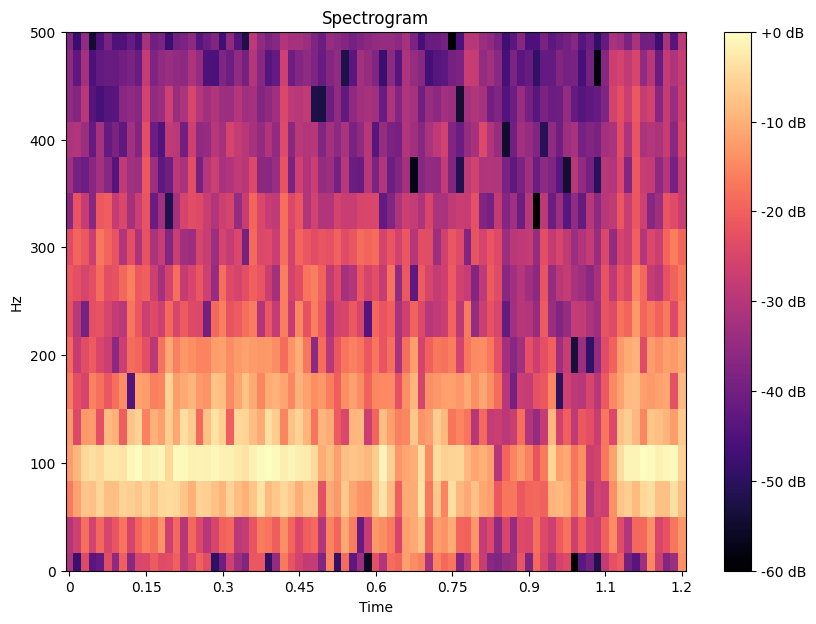

In [51]:
hop_length = 240 # 15 ms
n_window = 480 # 30 ms
n_fft = 480

X = librosa.stft(bass_hat_filtered, win_length = n_window, n_fft = n_fft, hop_length = hop_length, 
                 window = 'hamming')
S_librosa = librosa.amplitude_to_db(np.abs(X),ref=np.max, top_db = 100)

fig, ax = plt.subplots(figsize=(10, 7))

librosa.display.specshow(S_librosa, y_axis = 'linear', x_axis = 'time', sr = 16000, 
                         hop_length = hop_length, vmin=-60)

plt.ylim(0, 500)

plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

In [242]:
drums = example_["drums"].to_numpy()
drums_hat = example_["drums_hat"].to_numpy()

In [255]:
ipd.Audio(drums, rate=sr)

In [256]:
ipd.Audio(drums_hat, rate=sr)

In [47]:
hop_length = 240 # 15 ms
n_window = 480 # 30 ms
n_fft = 480

X = librosa.stft(drums, win_length = n_window, n_fft = n_fft, hop_length = hop_length, 
                 window = 'hamming')
S_librosa = librosa.amplitude_to_db(np.abs(X),ref=np.max, top_db = 100)

fig, ax = plt.subplots(figsize=(10, 7))

librosa.display.specshow(S_librosa, y_axis = 'linear', x_axis = 'time', sr = 16000, 
                         hop_length = hop_length, vmin=-60)

plt.ylim(0, 1000)

plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

NameError: name 'drums' is not defined

Text(0.5, 1.0, 'Spectrogram')

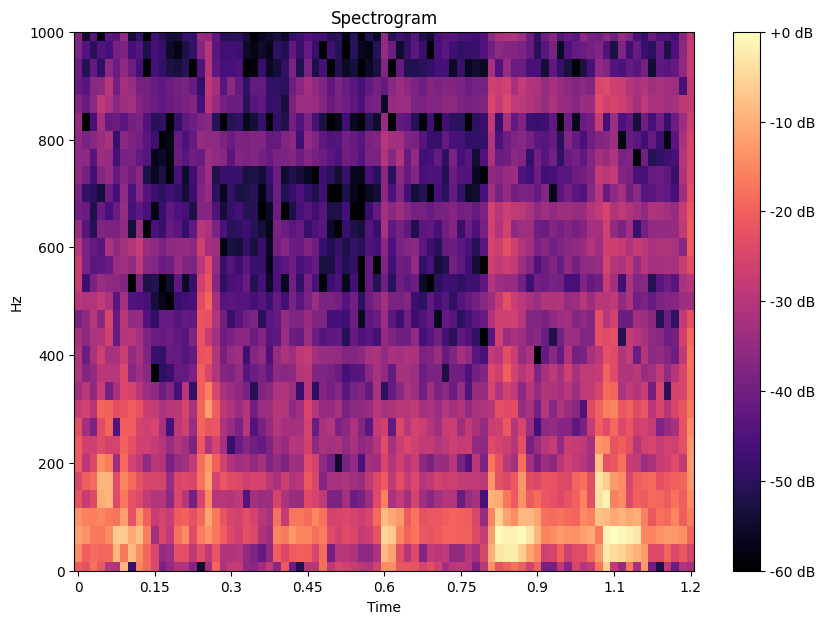

In [246]:
hop_length = 240 # 15 ms
n_window = 480 # 30 ms
n_fft = 480

X = librosa.stft(drums_hat, win_length = n_window, n_fft = n_fft, hop_length = hop_length, 
                 window = 'hamming')
S_librosa = librosa.amplitude_to_db(np.abs(X),ref=np.max, top_db = 100)

fig, ax = plt.subplots(figsize=(10, 7))

librosa.display.specshow(S_librosa, y_axis = 'linear', x_axis = 'time', sr = 16000, 
                         hop_length = hop_length, vmin=-60)

plt.ylim(0, 1000)

plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

In [247]:
vocals = example_["vocals"].to_numpy()
vocals_hat = example_["vocals_hat"].to_numpy()

Text(0.5, 1.0, 'Spectrogram')

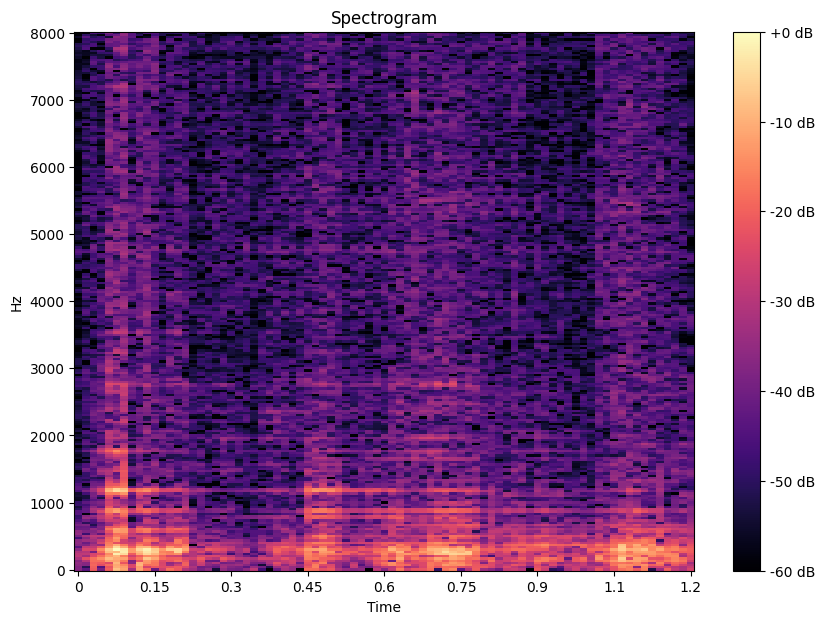

In [249]:
hop_length = 240 # 15 ms
n_window = 480 # 30 ms
n_fft = 480

X = librosa.stft(vocals_hat, win_length = n_window, n_fft = n_fft, hop_length = hop_length, 
                 window = 'hamming')
S_librosa = librosa.amplitude_to_db(np.abs(X),ref=np.max, top_db = 100)

fig, ax = plt.subplots(figsize=(10, 7))

librosa.display.specshow(S_librosa, y_axis = 'linear', x_axis = 'time', sr = 16000, 
                         hop_length = hop_length, vmin=-60)

#plt.ylim(0, 1000)

plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

In [106]:
bass_sdr = []
drums_sdr = []
vocals_sdr = []

for i in tqdm(range(frames.shape[0])):
    bass_sdr.append(calculate_sdr(bass_frames[i]))
    drums_sdr.append(calculate_sdr(drums_frames[i]))
    vocals_sdr.append(calculate_sdr(vocals_frames[i]))

  1%|          | 50/6388 [00:00<00:12, 494.54it/s]

100%|██████████| 6388/6388 [00:31<00:00, 204.51it/s]


In [107]:
bass_sdr

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [81]:
sdr = SignalDistortionRatio()

In [92]:
sdr(bass_frames[4000:4050, :, 0], bass_frames[4000:4050, :, 1])

tensor(-inf)

In [87]:
bass_frames[0, :, 0].shape

torch.Size([480])

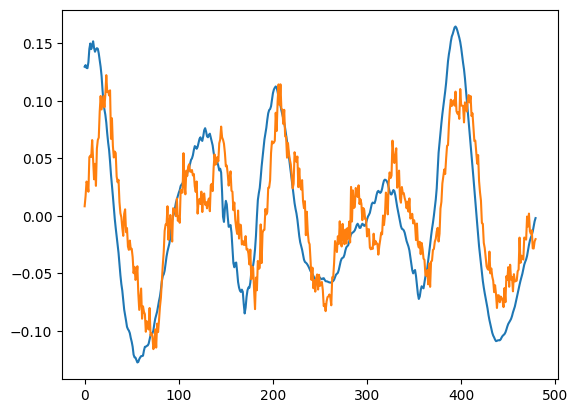

In [90]:
plt.plot(bass_frames[4000, :, 0])
plt.plot(bass_frames[4000, :, 1])

In [51]:
frame = frames[0]

bass = frame[0:2]
drums = frame[2:4]
vocals = frame[4:6]

In [50]:
frames[0].shape

(480, 6)

In [18]:
ex_hat = pd.read_csv("inference_train.csv")

In [28]:
ex_hat["bass"].to_numpy()

array([-0.00162215,  0.00601751, -0.00147951, ..., -0.00015564,
       -0.0009808 ,  0.00186328])

In [29]:
bass_hat = ex_hat["bass"].to_numpy()
bass_hat.shape

(3407520,)

In [30]:
init = 1900000-7000
end = 1909500

In [31]:
sdr = SignalDistortionRatio()
sdr(torch.tensor(bass_hat[init:end]), ex_[:bass_hat.shape[0]][init:end])

tensor(6.3020)

In [22]:
bass_hat

array([-0.00162215,  0.00601751, -0.00147951, ..., -0.00015564,
       -0.0009808 ,  0.00186328])

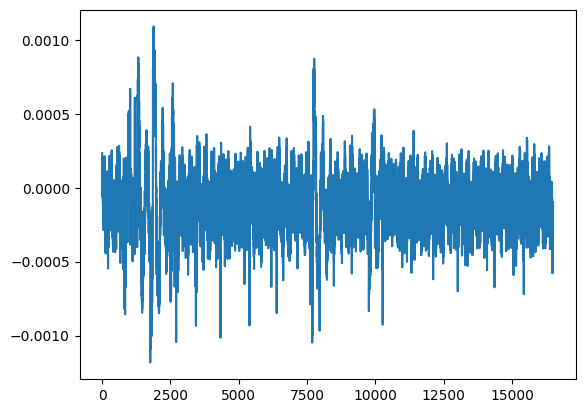

In [24]:
init = 1900000-7000
end = 1909500
plt.plot(ex_[init:end])
#plt.plot(ex_hat["bass"].to_numpy()[init:end])